In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install torch
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00


In [2]:
!pip install joblib

In [3]:
import pandas as pd


In [5]:
df = pd.read_csv('/content/heart_disease_uci.csv')


In [6]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [10]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,90
restecg,2
thalch,0


In [8]:
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

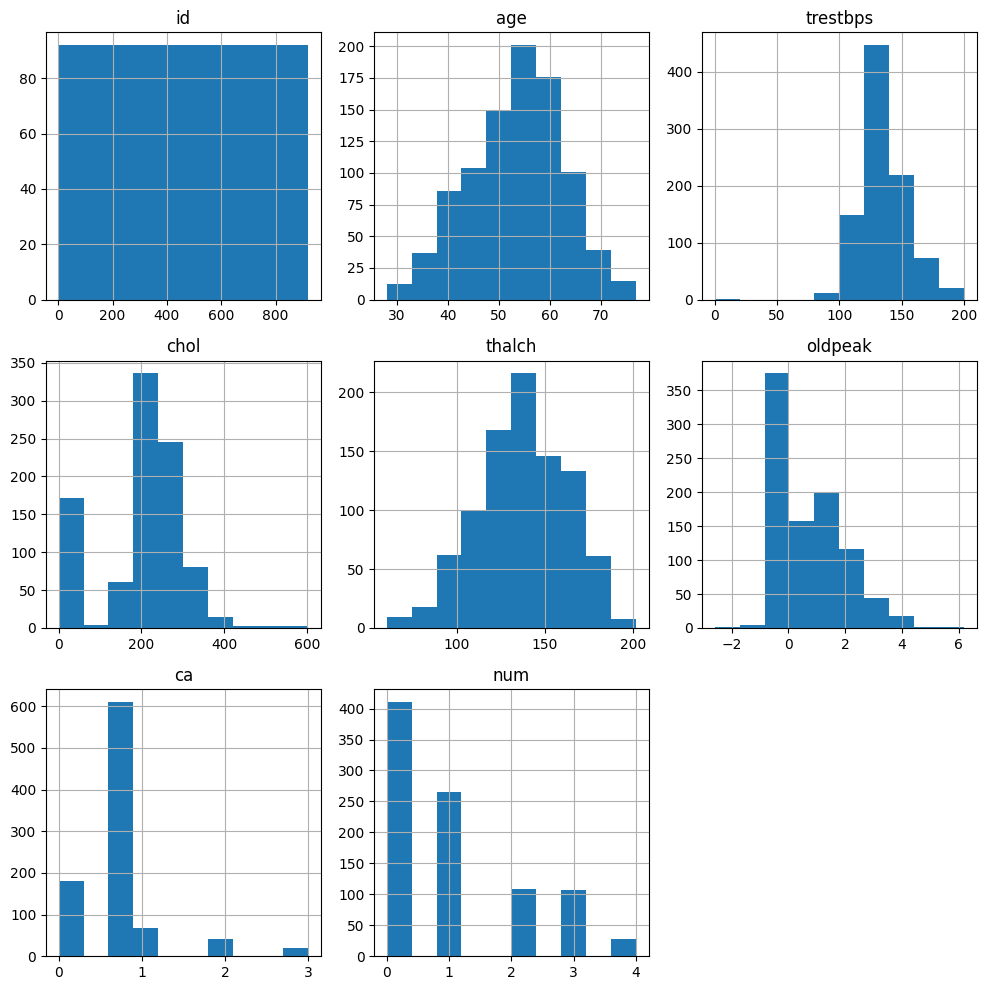

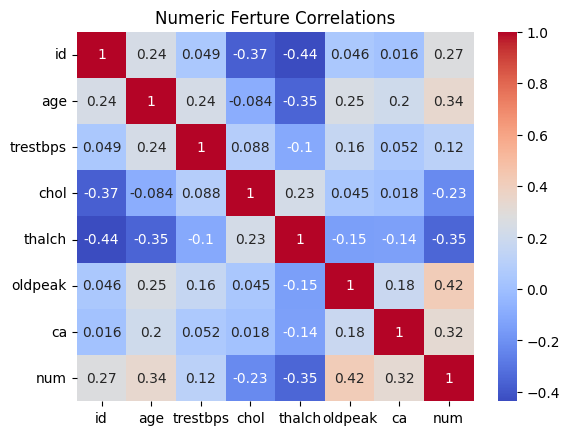

In [11]:
df[numerical_columns].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()
sns.heatmap(df[numerical_columns].corr(), annot=True,cmap='coolwarm')
plt.title('Numeric Ferture Correlations')
plt.show()

In [12]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')

In [13]:
x = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)

In [14]:
x = pd.get_dummies(x, columns=cat_cols)
print(x.columns)

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
lr_model = LogisticRegression()
lr_model.fit(x_train_scaled, y_train)

LogisticRegression()

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
y_pred = lr_model.predict(x_test_scaled)
print("Logiststic Regressinon Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logiststic Regressinon Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [24]:
from sklearn.metrics import confusion_matrix


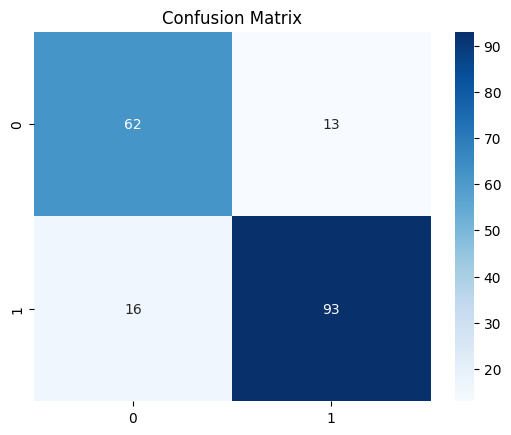

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


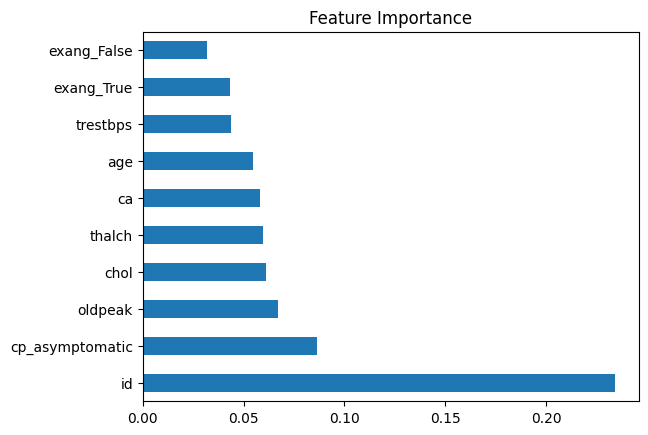

In [29]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')

plt.show()

In [30]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [40]:
user_df = pd.read_csv('/content/heart_dataset - heart_dataset.csv.csv')

numeric_cols = user_df.select_dtypes(include='number').columns.tolist()
cat_cols = user_df.select_dtypes(include='object').columns.tolist()
bool_cols = user_df.select_dtypes(include='bool').columns.tolist()


numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]


user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

for col in cat_cols:
  user_df[col] = user_df[col].fillna(user_df[col].mode()[0])

for col in bool_cols:
  user_df[col] = user_df[col].fillna(False)


user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)



user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

model = joblib.load('heart_rf_model.pkl')

predictions = model.predict(user_df_scaled)
user_df['Heart Disease'] = predictions

print(user_df)


   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  Heart Disease  
0                 